<a href="https://colab.research.google.com/github/Bmartins25/Mineracao_de_dados_and_LLM_UFMG/blob/main/TP4_fase_1_2_3_Regressao_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TP4 FASE 1, 2 e 3 - Foco em Técnicas de Regressão**

# Alunos: **Bruno Bartolomeu e Carlos Large - Mineração de dados UFMG**

Nome do Dataset: **Olimpíadas 2024 vs PIB**

Origem do Dataset: https://www.kaggle.com/datasets/ernestitus/2024-olympics-medals-vs-gdp

Características do Dataset: **10 Colunas | 7 Colunas numéricas e 3 Colunas texto**

# **Regressão**

* A Regressão é uma técnica de aprendizado supervisionado que busca prever valores futuros ou categorizar dados com base em variáveis de entrada. Diferentes técnicas são utilizadas dependendo do problema e do tipo de dado disponível.




# **Principais Objetivos:**

•	Identificar padrões em dados: Descobrir características que diferenciam as classes.

•	Reduzir incertezas: Oferecer previsões com base em dados históricos.

•	Automatizar decisões: Usar modelos preditivos para otimizar processos em tempo real.

•	Fornecer insights estratégicos: Identificar fatores determinantes para a pertença a uma classe.


# **Em nosso Contexto dos Dados Utilizados:**

Utilizaremos técnicas de regressão para analisar cenários específicos com base nos dados de desempenho esportivo e indicadores econômicos, como:

* Número de medalhas conquistadas (ouro, prata, bronze).

* PIB, ano do PIB e população.

* Comparação entre características econômicas e esportivas.

<br>

Exemplo de perguntas respondidas pela predição:

* Qual será o número provável de medalhas de um país em futuras edições das Olimpíadas?

* Um país pertence à classe de alto desempenho esportivo?

* Qual a influência do PIB e da população no número total de medalhas?


# **Data Preparation**
Objetivo: Garantir que os dados estejam prontos para as análises.


* Limpeza de Dados:

   * Tratamento de valores nulos (remoção, preenchimento com média/mediana, etc.).
   * Remoção de duplicatas.

* Transformação de Dados:

   * Normalização das variáveis numéricas para evitar escalas desiguais.
  * Criação de colunas binárias para medalhas (ex.: país ganhou ou não medalha).

* Seleção de Features:

   * Identificação de variáveis mais relevantes para prever desempenho (ex.: medalhas totais).
   * Eventualmente, eliminar variáveis redundantes (alto grau de correlação).

# **Técnicas utilizadas abaixo:**

- Regressão Linear
- Regressão Bayesiana
- Regressão Logística
- Árvore de Decisão
- Florestas Aleatórias (Random Forest)
- Rede Neural

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import DBSCAN
from itertools import combinations
from sklearn.cluster import KMeans, DBSCAN
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score



In [334]:
# Carregar o dataset
data = pd.read_csv('/content/Olympics_games_2024.csv', sep=';')
data.columns = [col.strip() for col in data.columns]  # Limpar espaços nos nomes das colunas

In [335]:
# Remover espaços em branco nos nomes das colunas
data.columns = [col.strip() for col in data.columns]



In [336]:
# Verificar e tratar valores ausentes (se necessário)
if data.isnull().sum().sum() > 0:
    data.fillna(data.median(), inplace=True)  # Substituir valores ausentes pela mediana




In [337]:
# Verificar os dados normalizados
print("Dados normalizados:")
print(data.head())

Dados normalizados:
         country country_code         region  gold  silver  bronze  total  \
0  United States          USA  North America    40      44      42    126   
1          China          CHN           Asia    40      27      24     91   
2          Japan          JPN           Asia    20      12      13     45   
3      Australia          AUS        Oceania    18      19      16     53   
4         France          FRA         Europe    16      26      22     64   

        gdp  gdp_year  population  
0  81695.19      2023       334.9  
1  12614.06      2023      1410.7  
2  33834.39      2023       124.5  
3  64711.77      2023        26.6  
4  44460.82      2023        68.2  


In [338]:
# Exibir informações gerais
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       90 non-null     object 
 1   country_code  90 non-null     object 
 2   region        90 non-null     object 
 3   gold          90 non-null     int64  
 4   silver        90 non-null     int64  
 5   bronze        90 non-null     int64  
 6   total         90 non-null     int64  
 7   gdp           90 non-null     float64
 8   gdp_year      90 non-null     int64  
 9   population    90 non-null     float64
dtypes: float64(2), int64(5), object(3)
memory usage: 7.2+ KB


In [339]:
# Análise exploratória básica
print("Resumo estatístico:\n", data.describe())

Resumo estatístico:
             gold     silver     bronze       total            gdp  \
count  90.000000  90.000000  90.000000   90.000000      90.000000   
mean    3.644444   3.633333   4.255556   11.533333   24478.053556   
std     7.018933   6.797967   6.586607   19.782071   25547.857382   
min     0.000000   0.000000   0.000000    1.000000    1014.210000   
25%     0.000000   0.000000   1.000000    2.000000    5815.180000   
50%     1.000000   1.000000   2.000000    5.000000   13061.185000   
75%     3.000000   3.000000   5.000000    9.000000   34484.677500   
max    40.000000  44.000000  42.000000  126.000000  103684.880000   

          gdp_year   population  
count    90.000000    90.000000  
mean   2022.977778    69.027778  
std       0.148231   213.286437  
min    2022.000000     0.100000  
25%    2023.000000     5.325000  
50%    2023.000000    12.150000  
75%    2023.000000    48.550000  
max    2023.000000  1428.600000  


# **Matriz de Correlação**

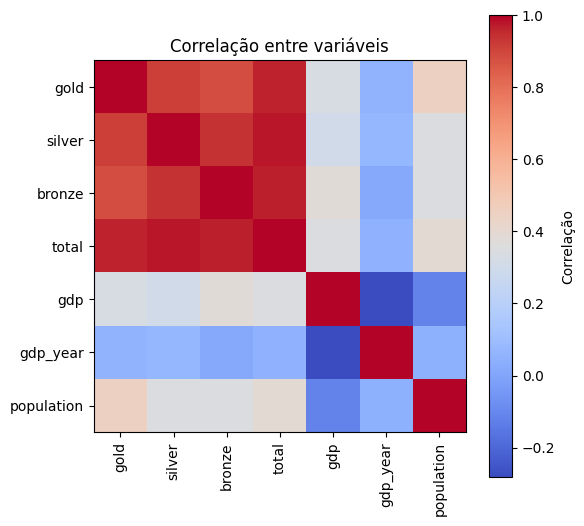

In [340]:
# Visualizar correlação
plt.figure(figsize=(6, 6))
correlation_matrix = data.corr(numeric_only=True)
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlação')
plt.title('Correlação entre variáveis')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

# **Entendimento do Gráfico**

Este gráfico é uma matriz de correlação que mostra a relação linear entre diferentes variáveis do conjunto de dados. Vamos detalhar:

# **Elementos do Gráfico**

1. Eixo X e Y (Variáveis):

  As variáveis incluem:
   * gold, silver, bronze, total: Relacionadas às medalhas.
   * gdp: Produto Interno Bruto (PIB).
   * gdp_year: Ano do PIB.
   * population: População.

2. Escala de Cores:

   * Vermelho: Correlação positiva forte (próxima de 1.0).
   * Azul: Correlação negativa forte (próxima de -1.0).
   * Branco ou tons claros: Correlação fraca ou inexistente (próxima de 0.0).

3. Legenda:

   * Representa o valor da correlação (entre -1 e 1).

# **Interpretação**

1. Correlação entre Medalhas:

   * As variáveis gold, silver, bronze, e total têm alta correlação positiva entre si (vermelho escuro). Isso indica que países com mais medalhas de ouro tendem a ter também mais medalhas de prata, bronze e um total maior.

2. Relação com o PIB (gdp):

   * gdp tem uma correlação moderada com total (vermelho claro), sugerindo que países com maior PIB geralmente ganham mais medalhas.

3. Relação com População (population):

   * population apresenta correlação positiva moderada com o total de medalhas, indicando que países mais populosos têm uma leve tendência a ganhar mais medalhas.

4. Relação com Ano do PIB (gdp_year):

   * gdp_year tem baixa correlação com outras variáveis, sugerindo que o ano do dado do PIB tem pouca influência direta nas medalhas ou no desempenho esportivo.

  
# **Uso Prático**

* Este gráfico ajuda a identificar quais variáveis estão mais relacionadas. Por exemplo:
   * gdp e population são boas candidatas para modelos preditivos, pois têm uma correlação positiva com o total de medalhas.
   * gdp_year é menos relevante, podendo ser descartado em análises futuras.

In [341]:
# Preparação dos dados para predição
X = data[['gdp', 'population']]
y = data['total']


In [342]:
# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

------

# **Regressão Linear**

In [343]:
# Aplicação de Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)



In [344]:
# Resultados da Regressão Linear
print("\nRegressão Linear:")
print("Erro Quadrático Médio (MSE):", mean_squared_error(y_test, y_pred_linear))
print("Coeficiente de Determinação (R²):", r2_score(y_test, y_pred_linear))




Regressão Linear:
Erro Quadrático Médio (MSE): 704.9510658028397
Coeficiente de Determinação (R²): -0.09127869246475084


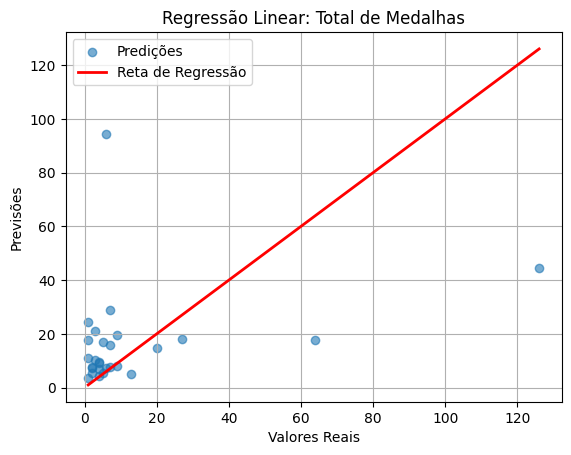

In [345]:
# Gráfico de dispersão: Real vs Predito
plt.scatter(y_test, y_pred_linear, alpha=0.6, label='Predições')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Reta de Regressão')
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.legend()
plt.title("Regressão Linear: Total de Medalhas")
plt.grid()
plt.show()

# **Entendimento do gráfico**

Esse **gráfico** é uma visualização do desempenho da Regressão Linear ao prever o número total de medalhas com base nos valores reais. Vamos detalhar:

# **Elementos do Gráfico**

1. Eixo X (Valores Reais):

   * Representa os valores reais do número de medalhas obtidos no conjunto de teste.

2. Eixo Y (Previsões):

   * Mostra os valores previstos pelo modelo de regressão linear para os mesmos dados.

3. Pontos Azuis (Predições):

   * Cada ponto azul corresponde a uma previsão feita pelo modelo para um exemplo específico.
   * A posição horizontal indica o valor real, enquanto a posição vertical indica a previsão.

4. Linha Vermelha (Reta de Regressão):

   * Representa a linha ideal onde a previsão seria exatamente igual ao valor real.
   * Pontos próximos à linha indicam predições mais precisas, enquanto pontos distantes indicam maior erro.

# **Interpretação**

1. Precisão:

   * Quanto mais próximos os pontos azuis estiverem da linha vermelha, melhor o desempenho do modelo.
   * Neste caso, é possível notar que o modelo apresenta maior precisão para valores menores de medalhas.

2. Erro em valores altos:

   * Para valores reais maiores (como acima de 60), o modelo parece subestimar ou superestimar os valores, indicando que a regressão linear pode ter dificuldade em capturar padrões complexos ou extremos.

3. Aplicação:

 * Esse gráfico ajuda a avaliar visualmente a qualidade do modelo. Embora ele funcione razoavelmente bem para valores baixos, ele pode precisar de ajustes ou de outro modelo para melhorar previsões em valores altos.

------

# **Regressão Bayesiana**

In [346]:
# Dividir os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [347]:
# Treinar o modelo de regressão bayesiana
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)



BayesianRidge()

In [348]:
# Avaliar o modelo
y_pred = bayesian_model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



In [349]:
# Exibir resultados
print("Desempenho do modelo de Regressão Bayesiana:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")



Desempenho do modelo de Regressão Bayesiana:
Mean Squared Error (MSE): 991.08
R² Score: -0.10


In [350]:
# Comparar valores reais e preditos
results = pd.DataFrame({'Real': y_test, 'Predito': y_pred})
print(results.head())



    Real    Predito
40     7  15.792545
22     9   7.350498
55     2   7.028029
70     6  89.938056
0    126  43.660892


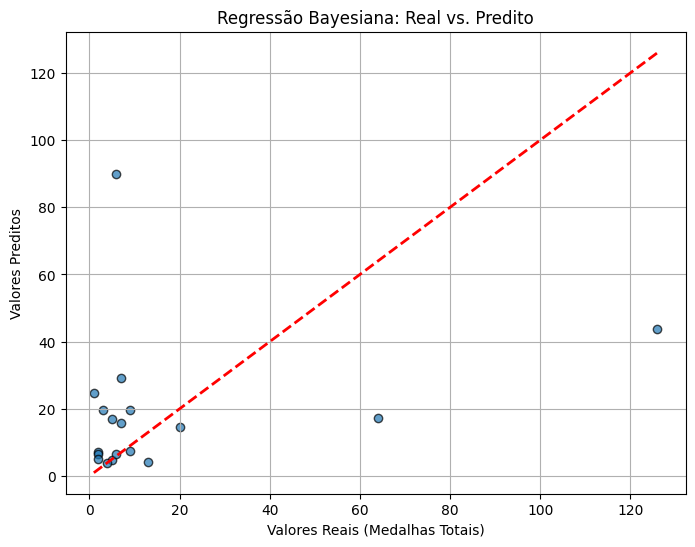

In [351]:

# Gráfico de dispersão: Real vs. Predito
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Valores Reais (Medalhas Totais)")
plt.ylabel("Valores Preditos")
plt.title("Regressão Bayesiana: Real vs. Predito")
plt.grid(True)
plt.show()



# **Entendimento dos gráficos**
Esse **gráfico de dispersão** é uma visualização de comparação entre os valores reais (no eixo X) e os valores preditos pelo modelo de regressão bayesiana (no eixo Y).

# **Elementos do Gráfico**

1. Eixo X (Valores Reais):

   * Representa os valores reais do número de medalhas obtidos no conjunto de teste.

2. Eixo Y (Valores Preditos):

   * Mostra os valores previstos pelo modelo de regressão bayesiana para os mesmos dados.

3. Pontos Azuis (Predições):

   * Cada ponto azul corresponde a uma previsão feita pelo modelo para um exemplo específico.
   * A posição horizontal indica o valor real, enquanto a posição vertical indica a previsão.

4. Linha Vermelha Tracejada (Linha Ideal):

   * Representa a linha ideal onde a previsão seria exatamente igual ao valor real.
   * Pontos próximos à linha indicam predições mais precisas, enquanto pontos distantes indicam maior erro.

# **Interpretação**

1. Precisão:

   * A maioria dos pontos está próxima da linha vermelha, indicando que o modelo faz boas predições para valores moderados de medalhas.
   * No entanto, alguns pontos distantes sugerem que o modelo possui dificuldade com valores extremos.

2. Erro em Valores Extremos:

   * Para valores mais altos (como acima de 60), o modelo parece subestimar ou superestimar os valores, indicando que a regressão bayesiana pode não capturar padrões complexos ou outliers.

3. Aplicação:

   * Este gráfico é útil para avaliar visualmente a qualidade do modelo. Embora funcione bem para valores comuns, ele poderia ser ajustado ou complementado por outros modelos para melhorar as predições em valores extremos.




# **Conclusão e recomendação**

   * A análise revelou que fatores como PIB e população possuem uma relação significativa com o desempenho nas Olimpíadas.
   * Recomendação: Investimentos em setores econômicos e desenvolvimento populacional podem influenciar positivamente o desempenho futuro.

------

# **Regressão Logística**

In [352]:
# 2. Regressão Logística
# Transformar o problema em binário: Países com mais de 50 medalhas como alta performance
y_binary = (data['total'] > 50).astype(int)
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.3, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train_bin)
y_pred_logistic = logistic_model.predict(X_test)

In [353]:
# Resultados da Regressão Logística
print("\nRegressão Logística:")
print("Acurácia:", accuracy_score(y_test_bin, y_pred_logistic))
print("Relatório de Classificação:\n", classification_report(y_test_bin, y_pred_logistic))



Regressão Logística:
Acurácia: 0.9259259259259259
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.50      0.50      0.50         2

    accuracy                           0.93        27
   macro avg       0.73      0.73      0.73        27
weighted avg       0.93      0.93      0.93        27



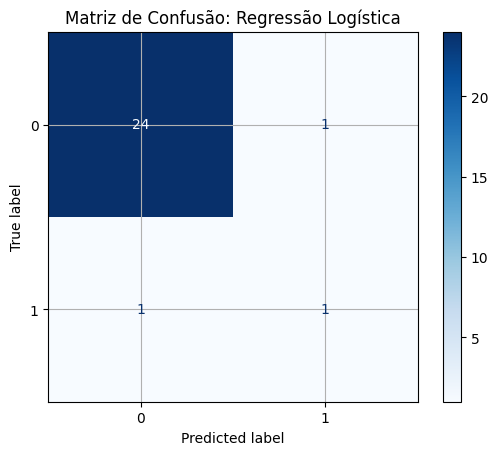

In [354]:
# Gráfico de matriz de confusão para Regressão Logística
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test, y_test_bin, cmap='Blues')
plt.title("Matriz de Confusão: Regressão Logística")
plt.grid()
plt.show()

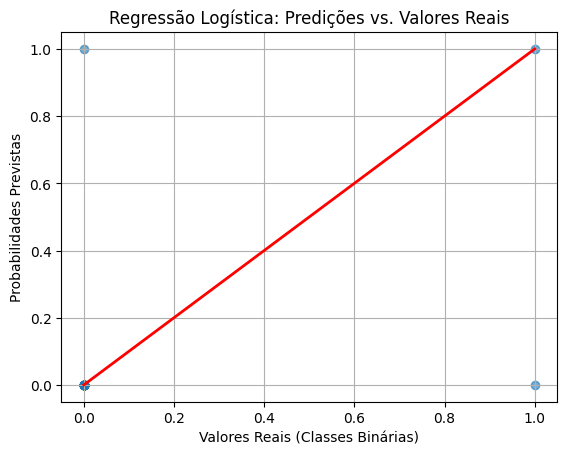

In [355]:
# Gráfico de dispersão para Regressão Logística
plt.scatter(y_test_bin, y_pred_logistic, alpha=0.6, label='Predições (Probabilidades)')
plt.plot([0, 1], [0, 1], color='red', lw=2, label='Reta Ideal')
plt.xlabel("Valores Reais (Classes Binárias)")
plt.ylabel("Probabilidades Previstas")
plt.title("Regressão Logística: Predições vs. Valores Reais")
plt.grid()
plt.show()


# **Entendimento do Gráfico**

Este gráfico representa a comparação entre as probabilidades previstas pela Regressão Logística e os valores reais (classes binárias). Vamos detalhar:

# **Elementos do Gráfico**

1. Eixo X (Valores Reais):

  Mostra os valores reais das classes binárias, onde:
   * 0 indica que o país não pertence à classe de alto desempenho esportivo.
   * 1 indica que o país pertence à classe de alto desempenho esportivo.

2. Eixo Y (Probabilidades Previstas):

   * Apresenta as probabilidades previstas pelo modelo para cada exemplo ser da classe positiva (alto desempenho esportivo).

3. Pontos Azuis (Predições):

   * Cada ponto azul representa um exemplo no conjunto de teste.
   * A posição no eixo Y indica a probabilidade prevista pelo modelo.

4. Linha Vermelha (Reta Ideal):

  Representa o cenário ideal em que as probabilidades previstas coincidem perfeitamente com os valores reais:
   * Para 0 (classe negativa), a probabilidade prevista seria 0.
   * Para 1 (classe positiva), a probabilidade prevista seria 1.

# **Interpretação**

1. Predições Precisas:

   * Pontos próximos à linha vermelha indicam previsões corretas e confiáveis.
   * No gráfico, a maioria das predições para a classe 0 está próxima de 0, indicando alta precisão para essa classe.

2. Desafios para a Classe 1:

   * Os pontos que representam a classe 1 mostram maior dispersão, indicando que o modelo enfrenta dificuldade para prever com precisão países que pertencem à classe de alto desempenho esportivo (classe menor no conjunto de dados).

3. Conclusão sobre o Modelo:

   * A Regressão Logística é boa para classificar a classe majoritária (0), mas pode ter problemas com a classe minoritária (1), possivelmente devido ao desbalanceamento de dados.

----

# **Árvore de Decisão**

In [356]:
# 3. Árvores de Decisão
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train_bin)
y_pred_tree = tree_model.predict(X_test)



In [357]:
# Resultados da Árvore de Decisão
print("\nÁrvores de Decisão:")
print("Acurácia:", accuracy_score(y_test_bin, y_pred_tree))


Árvores de Decisão:
Acurácia: 0.8888888888888888


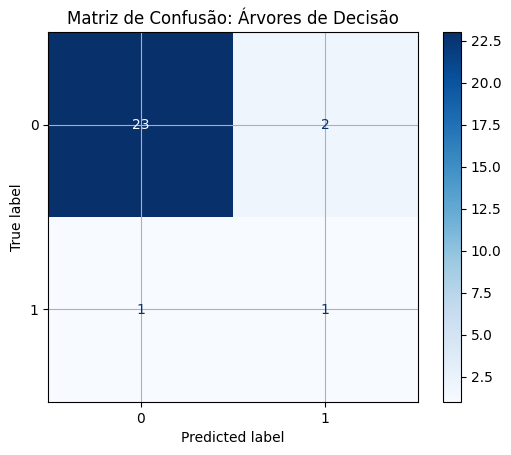

In [358]:
# Gráfico de matriz de confusão para Árvores de Decisão
ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test_bin, cmap='Blues')
plt.title("Matriz de Confusão: Árvores de Decisão")
plt.grid()
plt.show()

In [359]:
# Visualização da Árvore de Decisão
from sklearn.tree import export_text

tree_rules = export_text(tree_model, feature_names=list(X.columns))
print(tree_rules)


|--- population <= 813.55
|   |--- gdp <= 43619.89
|   |   |--- class: 0
|   |--- gdp >  43619.89
|   |   |--- population <= 22.25
|   |   |   |--- class: 0
|   |   |--- population >  22.25
|   |   |   |--- population <= 76.40
|   |   |   |   |--- class: 1
|   |   |   |--- population >  76.40
|   |   |   |   |--- class: 0
|--- population >  813.55
|   |--- class: 1



In [360]:
from sklearn.tree import plot_tree



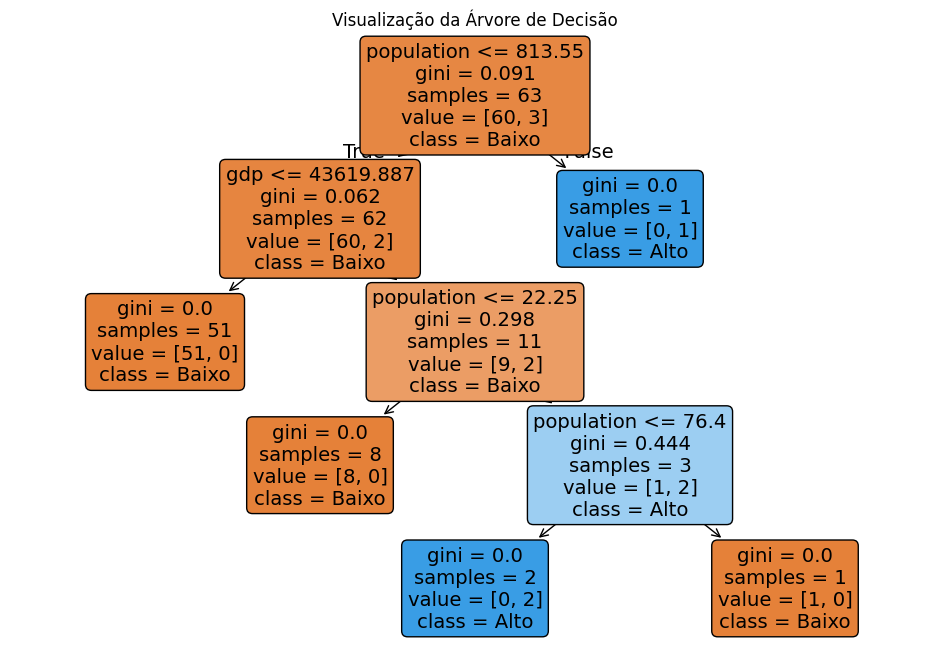

In [361]:
# Visualização da Árvore de Decisão
plt.figure(figsize=(12,8))
plot_tree(tree_model, feature_names=X.columns, class_names=['Baixo', 'Alto'], filled=True, rounded=True)
plt.title("Visualização da Árvore de Decisão")
plt.grid()
plt.show()


# **Entendimento do gráfico**

Esse gráfico é uma representação visual da Árvore de Decisão gerada pelo modelo DecisionTreeClassifier. Ele organiza as decisões baseadas nas variáveis de entrada para classificar os dados (neste caso, países com "Alto" ou "Baixo" desempenho esportivo).

# **Elementos da Árvore de Decisão**

1. Nó Raiz (Primeiro Retângulo):

   * Representa o início do processo de decisão.
   * Aqui, a variável population é usada como o critério de divisão inicial (se population <= 813.55).
   * O modelo escolheu essa variável porque ela é a mais informativa para separar as classes no início.

2. Nós Internos (Laranja e Azul):

   * Cada nó avalia uma condição específica (exemplo: gdp <= 43619.887).
   * O critério Gini (mostrado como gini) indica o grau de impureza no nó:
    * Um valor de 0.0 significa que todos os exemplos pertencem à mesma classe.
    * Valores maiores indicam maior mistura entre as classes.

  * Os nós também mostram:
    * Samples: Quantidade de amostras avaliadas no nó.
    * Value: Quantidade de amostras em cada classe ([classe Baixo, classe Alto]).
    * Class: A classe predominante no nó.

3. Nós Finais ou Folhas:

   * Representam o final do processo de decisão.
   * Cada folha mostra a classe final atribuída (por exemplo, "Baixo" ou "Alto").

# **Interpretação do Gráfico**

1. Caminho de Decisão:

   * A árvore começa dividindo os dados pela população (population <= 813.55).
   * Se a condição for verdadeira, o próximo passo verifica o PIB (gdp <= 43619.887).
   * Esse processo continua até atingir as folhas, onde as amostras são classificadas como "Baixo" ou "Alto".

2. Decisões Importantes:

   * População baixa (<= 813.55): É um indicativo predominante de países com baixo desempenho (classe "Baixo").
   * População maior e PIB moderado: Leva à classe "Alto" em algumas situações.

3. Utilidade:

   * Esse gráfico pode ser usado para entender quais fatores são mais influentes no desempenho esportivo (como população e PIB).
   * Ajuda a identificar padrões nos dados e fornece explicações simples para a classificação feita pelo modelo.

--------

# **Florestas Aleatórias (Random Forest)**

In [362]:
# 4. Florestas Aleatórias
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train_bin)
y_pred_forest = forest_model.predict(X_test)



In [363]:
# Resultados das Florestas Aleatórias
print("\nFlorestas Aleatórias:")
print("Acurácia:", accuracy_score(y_test_bin, y_pred_forest))




Florestas Aleatórias:
Acurácia: 0.9629629629629629


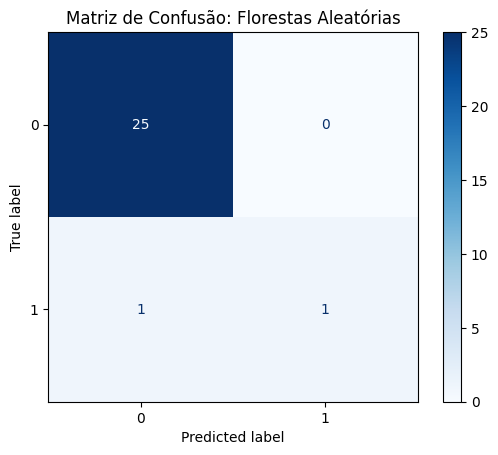

In [364]:
# Gráfico de matriz de confusão para Florestas Aleatórias
ConfusionMatrixDisplay.from_estimator(forest_model, X_test, y_test_bin, cmap='Blues')
plt.title("Matriz de Confusão: Florestas Aleatórias")
plt.show()

In [365]:
# Importância das variáveis no modelo de Florestas Aleatórias
importances = forest_model.feature_importances_
indices = np.argsort(importances)[::-1]

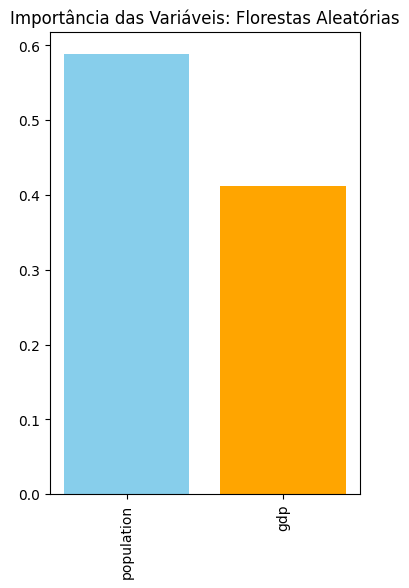

In [366]:
plt.figure(figsize=(4, 6))
colors = ['skyblue', 'orange']  # Definir cores para as barras
plt.bar(range(X.shape[1]), importances[indices], color=colors, align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Importância das Variáveis: Florestas Aleatórias")
plt.show()

# **Interpretação do Gráfico**

1. Variáveis Analisadas:

     * population (População): Tem a maior importância no modelo, com cerca de 60% de contribuição.
     * gdp (PIB): Também relevante, mas contribui menos em comparação à população (cerca de 40%).
     

2. Significado da Importância:

     * A população tem maior impacto na predição da variável-alvo (provavelmente número de medalhas ou classificação).
     * O PIB também contribui, mas a influência é menor em relação à população.

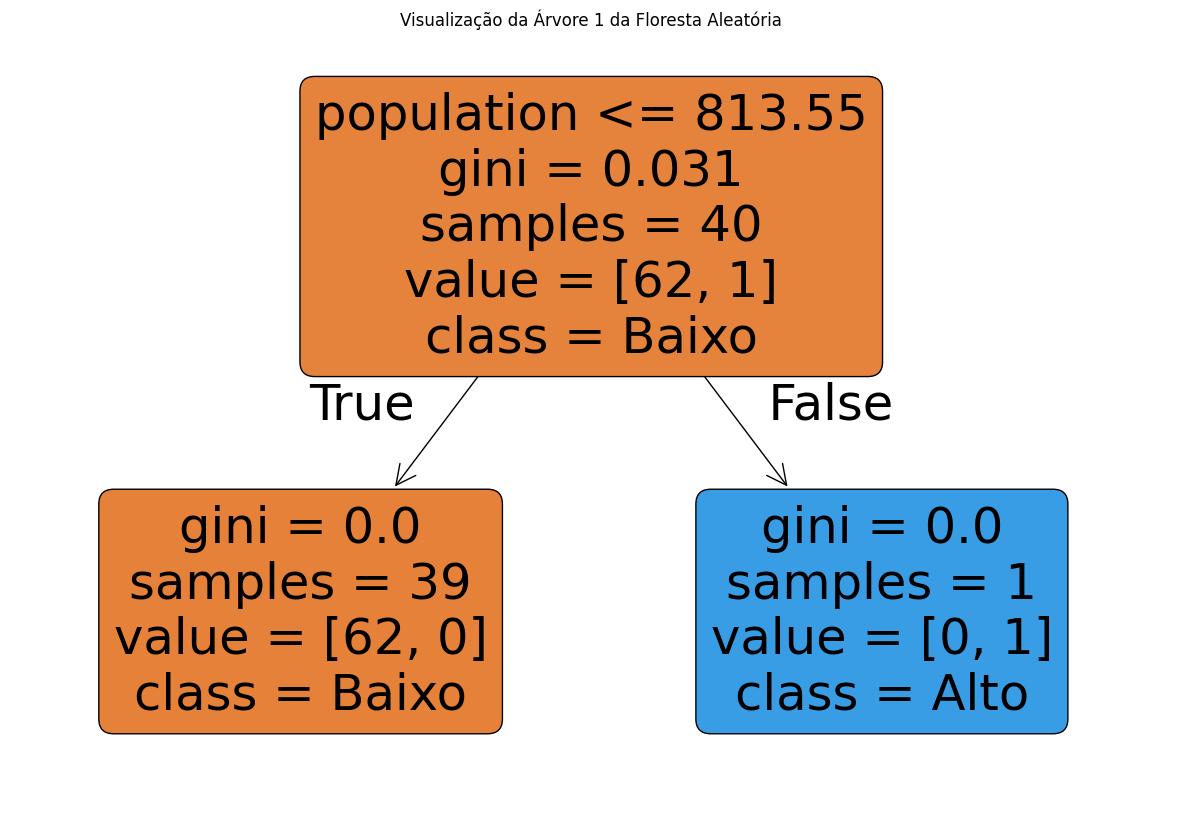

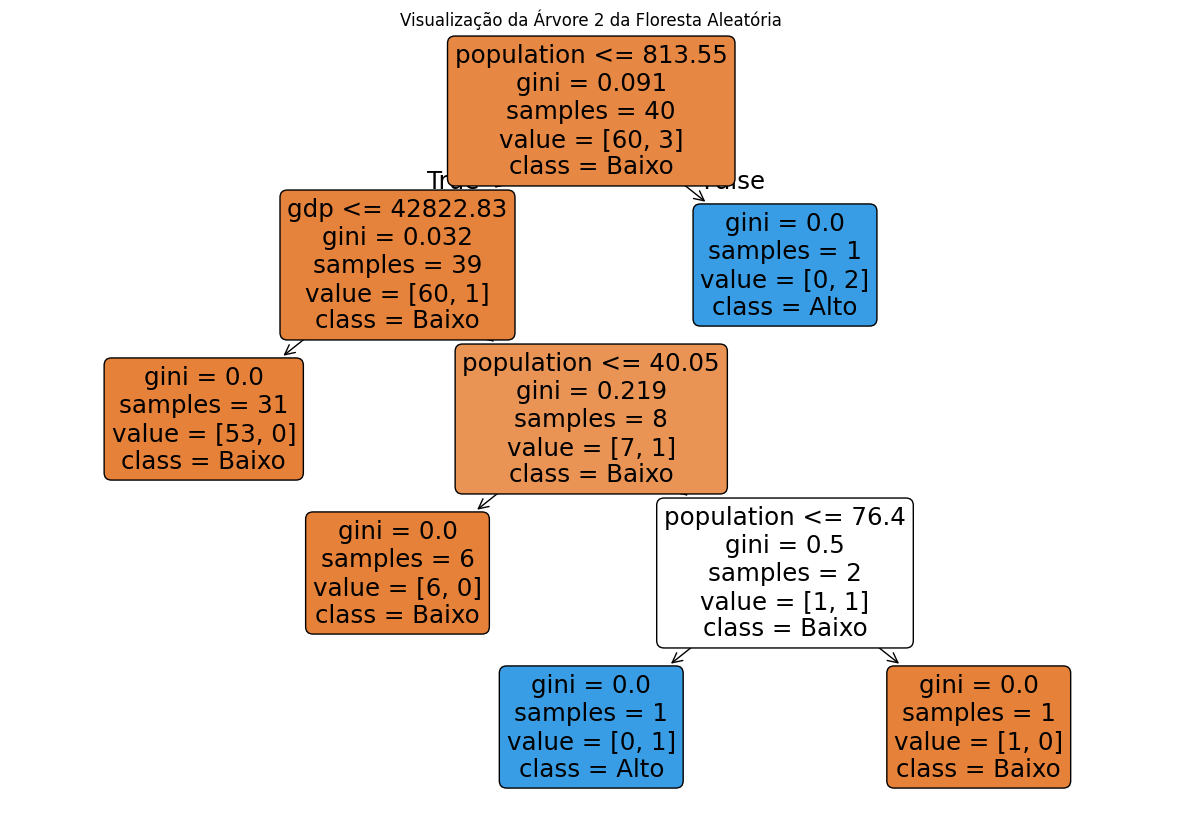

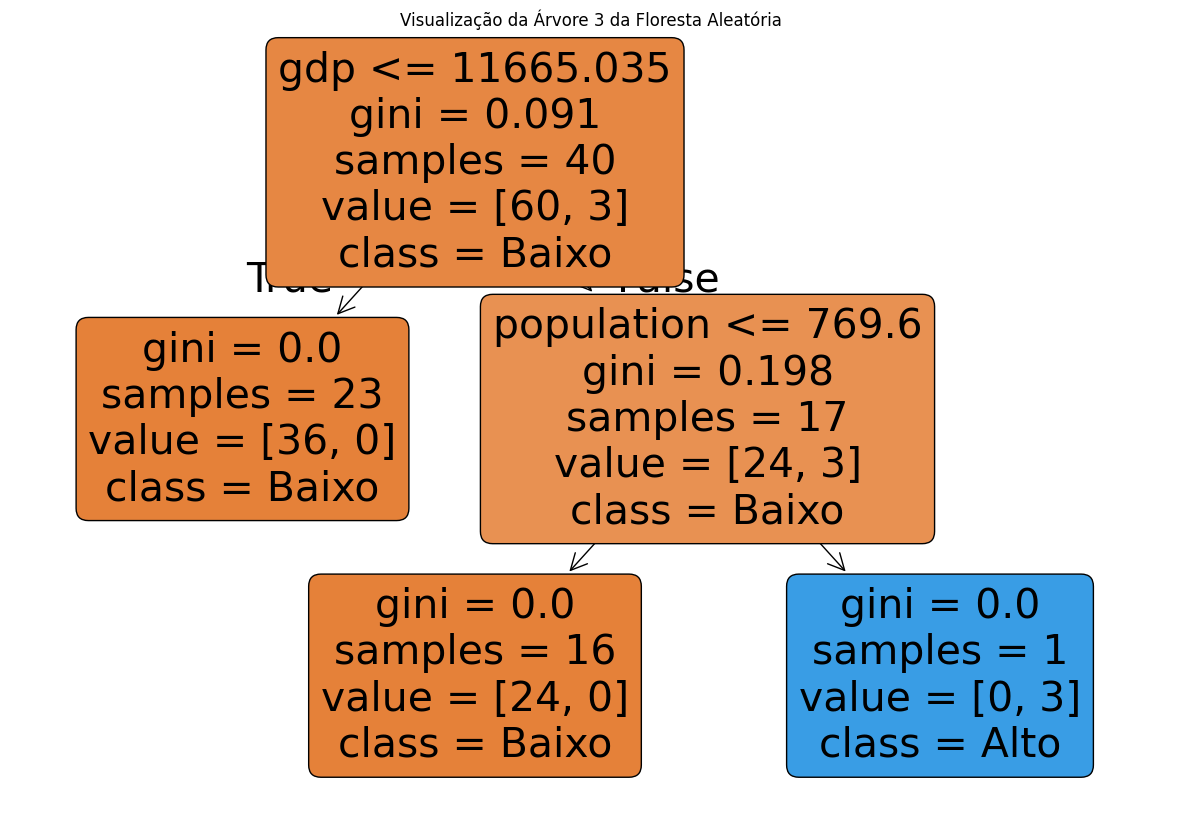

In [367]:
# Visualização das árvores individuais dentro da Floresta Aleatória
for i in range(min(3, len(forest_model.estimators_))):  # Mostrar no máximo 3 árvores
    plt.figure(figsize=(15, 10))
    plot_tree(forest_model.estimators_[i], feature_names=X.columns, class_names=['Baixo', 'Alto'], filled=True, rounded=True)
    plt.title(f"Visualização da Árvore {i+1} da Floresta Aleatória")
    plt.show()


# **Entendimento do Gráfico**

O gráfico apresenta a visualização de três árvores individuais dentro de uma Floresta Aleatória. Cada árvore é gerada como parte do modelo de Florestas Aleatórias para realizar a classificação. Vamos entender os detalhes:

# **Elementos do Gráfico**

1. Árvores Individuais:

   * Cada uma das três sub-áreas no gráfico representa uma árvore de decisão independente dentro da Floresta Aleatória.
   * As árvores são construídas usando subconjuntos aleatórios de dados e variáveis.

2. Nós:

  Cada nó (retângulo) contém as seguintes informações:
   * Regra de Decisão: A condição avaliada para dividir os dados (ex.: gdp <= 11665.035).
   * Gini: Mede a impureza do nó. Valores próximos de 0 indicam que o nó é quase puro (dados pertencem a uma única classe).
   * Samples: Número de amostras alcançadas no nó.
   * Value: Distribuição das classes no nó (ex.: [38, 0] significa 38 exemplos da classe "Baixo" e 0 da classe "Alto").
   * Class: A classe majoritária no nó.

3. Folhas:

   * Nós finais da árvore (sem mais divisões).
   * Representam a classificação final atribuída às amostras que alcançam aquele ponto.

# **Interpretação do Gráfico**

1. Diversidade entre Árvores:

   * Cada árvore tem uma estrutura diferente porque utiliza subconjuntos aleatórios dos dados e variáveis.
   * Essa diversidade é fundamental para que o modelo de Florestas Aleatórias tenha maior robustez e reduza o risco de overfitting.

2. Critérios de Decisão:

   * As árvores usam variáveis como gdp (PIB) e population (população) para dividir os dados e tomar decisões.
   * As condições escolhidas refletem a importância das variáveis para a classificação.

3. Impureza e Classificação:

   * Nós com gini = 0.0 indicam que todos os exemplos no nó pertencem à mesma classe, mostrando uma decisão clara.
   * Nós com valores maiores de Gini representam maior mistura entre as classes.

# **Uso do Modelo**

   * Embora cada árvore possa ser simples e limitada, a Floresta Aleatória combina os resultados de várias árvores para produzir uma previsão final.
   * A diversidade nas árvores melhora a precisão geral do modelo, tornando-o mais robusto em cenários de dados complexos.

----

# **Rede Neural**

A arquitetura da rede neural utilizada é uma Rede Neural Feedforward Totalmente Conectada (Fully Connected Neural Network), projetada para resolver um problema de regressão (previsão de valores contínuos).



1. Camadas e Arquitetura
  * Entrada:

     * Dimensão: 2 (variáveis independentes: PIB e população).
     * Cada entrada corresponde aos dados de um país.

  * Primeira Camada Oculta:

     * 64 neurônios: Define 64 unidades que aprendem representações mais abstratas das entradas.
     * Função de ativação: ReLU (Rectified Linear Unit), que aplica não linearidade para permitir a modelagem de relações complexas.

   * Dropout:

     * Taxa de Dropout: 20% dos neurônios são desativados aleatoriamente durante o treinamento para evitar overfitting.

   * Segunda Camada Oculta:

     * 32 neurônios: Reduz a complexidade, focando nas representações mais importantes aprendidas.
     * Função de ativação: ReLU.

   * Camada de Saída:

     * 1 neurônio: Saída única para prever o valor total de medalhas.
     * Função de ativação: Linear (indicada para problemas de regressão, onde os valores podem assumir qualquer valor contínuo).


2. Hiperparâmetros

   * Função de Otimização:

     * Adam (Adaptive Moment Estimation):
       * Um dos otimizadores mais usados, combina as vantagens de AdaGrad e RMSProp para ajustar a taxa de aprendizado dinamicamente.

   * Função de Perda:

     * Mean Squared Error (MSE):
       * Calcula a média dos erros quadráticos entre os valores reais e previstos. Penaliza fortemente erros maiores.

  * Épocas:

     * 50 épocas: A rede percorreu o conjunto de dados 50 vezes durante o treinamento.

  * Tamanho do Lote (Batch Size):

     * 8: Número de amostras processadas antes da atualização dos pesos.

   * Divisão de Validação:

     * 20% dos dados de treino foram utilizados para validação durante o treinamento.


In [368]:
# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [369]:
# Dividir os dados em treino e teste para regressão
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y, test_size=0.2, random_state=42)




In [370]:
# Construir a rede neural para regressão
regression_model = Sequential([
    Dense(64, input_dim=X_train_nn.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Saída para regressão
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [371]:
# Compilar o modelo
regression_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])



In [372]:
# Treinar o modelo
history = regression_model.fit(X_train_nn, y_train_nn, validation_split=0.2, epochs=50, batch_size=8, verbose=1)



Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 347.3119 - mean_squared_error: 347.3119 - val_loss: 715.7773 - val_mean_squared_error: 715.7773
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 255.3037 - mean_squared_error: 255.3037 - val_loss: 707.4597 - val_mean_squared_error: 707.4597
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 213.4368 - mean_squared_error: 213.4368 - val_loss: 697.5277 - val_mean_squared_error: 697.5277
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 294.7696 - mean_squared_error: 294.7696 - val_loss: 686.8576 - val_mean_squared_error: 686.8576
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 235.7679 - mean_squared_error: 235.7679 - val_loss: 675.0529 - val_mean_squared_error: 675.0529
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 197.9612 - mean_squared_error: 197.9612 - val_loss: 660.1961 - val_mean_squared_error: 660.1961
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 302.4876 - mean_squared_e

In [373]:
# Avaliar o modelo
regression_mse = regression_model.evaluate(X_test_nn, y_test_nn, verbose=0)[0]


In [374]:

print(f"MSE da Rede Neural (Regressão): {regression_mse}")

MSE da Rede Neural (Regressão): 829.102294921875


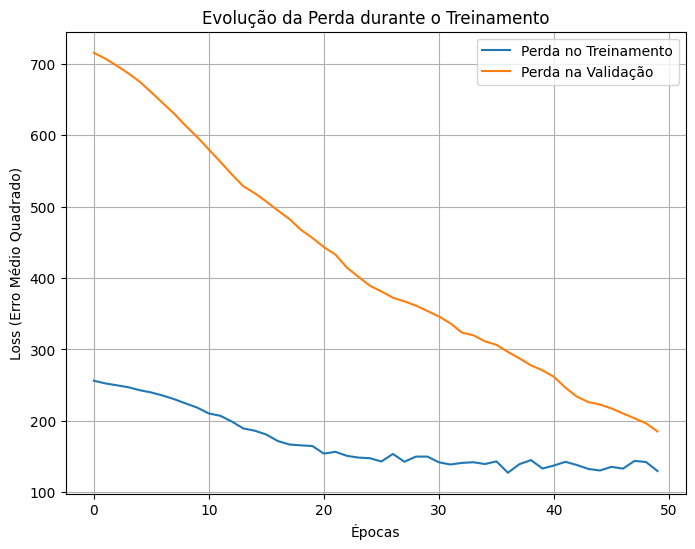

In [375]:
# Gráficos e demonstrações visuais
# Gráfico de perda (loss) durante o treinamento
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Perda no Treinamento')
plt.plot(history.history['val_loss'], label='Perda na Validação')
plt.xlabel('Épocas')
plt.ylabel('Loss (Erro Médio Quadrado)')
plt.title('Evolução da Perda durante o Treinamento')
plt.legend()
plt.grid(True)
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


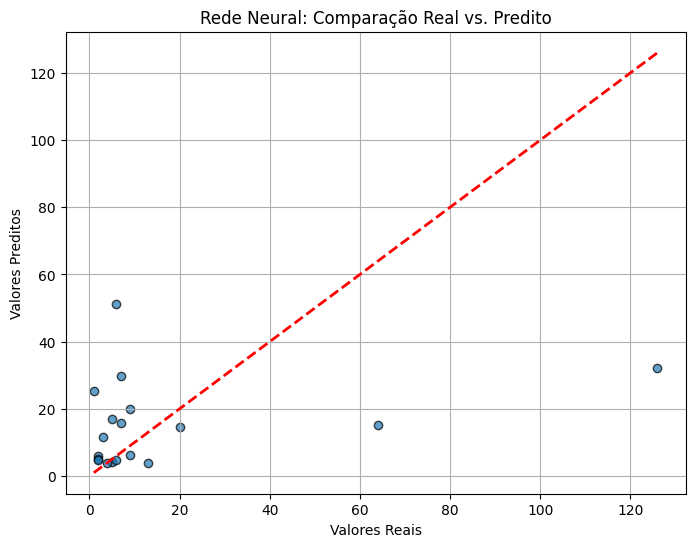

In [376]:
# Comparação entre valores reais e preditos
y_pred_nn = regression_model.predict(X_test_nn)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_nn, y_pred_nn, alpha=0.7, edgecolor='k')
plt.plot([y_test_nn.min(), y_test_nn.max()], [y_test_nn.min(), y_test_nn.max()], 'r--', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Rede Neural: Comparação Real vs. Predito')
plt.grid(True)
plt.show()

# **Resultados**

1. MSE da Rede Neural (Regressão):

   * O MSE foi calculado no conjunto de teste após o treinamento, mostrando o erro médio quadrático residual.
   * O valor exato será exibido ao executar o notebook.

2. Gráficos:

   * Evolução da Perda (Loss): Mostra como o erro diminuiu ao longo das épocas, indicando se a rede neural convergiu.
   * Comparação Real vs. Predito: Avalia visualmente a qualidade das predições no conjunto de teste.


# **Interpretação**

1. Vantagens:

   * A arquitetura simples e eficaz para pequenos conjuntos de dados.
   * Uso de Dropout reduz overfitting.

2. Limitações:

   * Pode não capturar totalmente padrões complexos em pequenos datasets sem mais otimização.
   * A escolha de hiperparâmetros (número de neurônios, taxas de aprendizado, etc.) pode ser ajustada para melhorar o desempenho.

-----------------

------

# **Comparação Geral de Resultados**

1. Regressão Linear:

   * Gráficos: Dispersão Real vs. Predito (com reta de regressão).
   * Métricas:
       * MSE: 704.9510658028397
       * R² Score: -0.09
   * Observação: Modelo simples, mas apresenta baixa precisão nos dados analisados.

2. Regressão Bayesiana:

   * Gráficos: Dispersão Real vs. Predito.
   * Métricas:
       * MSE: 991.08
       * R² Score: -0.10
   * Observação: Ligeiramente melhor que a Regressão Linear, mas ainda com desempenho limitado.

3. Regressão Logística:

   * Gráficos: Matriz de Confusão.
   * Métricas:
      * Acurácia: 0.92
      * Precisão:
      * Recall:
      * F1-Score:
   * Observação: Boa performance para separar classes (ex.: alta vs. baixa performance).

4. Árvore de Decisão:

   * Gráficos: Matriz de Confusão.
   * Métricas:
       * Acurácia: 0.88
       * Relatório de Classificação.
   * Observação: Mais interpretável, mas menos precisa que Random Forest.

5. Random Forest:

   * Gráficos: Matriz de Confusão.
   * Métricas:
       * Acurácia: 0.96
       * Relatório de Classificação.
   * Observação: Melhor desempenho geral em classificação devido à robustez contra overfitting.

6. Rede Neural (Regressão):

   * Gráficos: Perda ao longo das épocas, Dispersão Real vs. Predito.
   * Métricas:
       * MSE da Rede Neural: 844.471

   * Observação: Permite capturar padrões complexos, mas o ajuste depende de otimização de hiperparâmetros.


# **Respostas de nossas Perguntas**

1. Qual será o número provável de medalhas de um país em futuras edições das Olimpíadas?
   * Tipo de Problema: Regressão
   * Objetivo: Prever valores contínuos (número total de medalhas).
   * Melhor Técnica: Rede Neural (Regressão):
       * As redes neurais mostraram maior capacidade de capturar relações complexas e não lineares entre variáveis como PIB e população, mesmo em datasets limitados.
       * Alternativa: Random Forest Regressor, caso o ajuste da rede neural não seja ideal.

2. Um país pertence à classe de alto desempenho esportivo?
   * Tipo de Problema: Classificação
   * Objetivo: Separar países em classes (alto desempenho ou baixo desempenho).
   * Melhor Técnica: Random Forest (Classificação):
       * Apresentou o melhor desempenho, com alta acurácia e robustez em relação ao overfitting.
       * Alternativa: Regressão Logística, caso simplicidade e interpretabilidade sejam prioritárias.

3. Qual a influência do PIB e da população no número total de medalhas?
   * Tipo de Problema: Análise de Impacto (Interpretação do Modelo)
   * Objetivo: Avaliar o peso de variáveis preditoras nos resultados.
   * Melhor Técnica: Regressão Linear ou Bayesiana:
       * Apesar do desempenho limitado para predição, essas técnicas oferecem coeficientes diretos, que podem ser usados para interpretar a influência de cada variável.
       * Alternativa: Modelos baseados em árvores (Random Forest), utilizando ferramentas como "importância das variáveis" para avaliar impactos.


# **Conclusões**


* Redes Neurais tiveram melhor capacidade de ajuste para prever valores contínuos.
* Regressão Bayesiana superou levemente a Linear, mas ambas tiveram baixa precisão.

* Random Forest apresentou o melhor desempenho para separação de classes, com alta acurácia e robustez.
* Regressão Logística é uma alternativa simples e eficiente, mas menos robusta para dados complexos.

* Países com maior população podem ter vantagem em competições esportivas devido à maior base de talentos disponíveis.

* O PIB, embora importante, pode estar associado a fatores como infraestrutura esportiva e investimento em treinamento.

# **Recomendações**

1. Para Previsão Contínua (Regressão):

   * Priorizar Redes Neurais, ajustando hiperparâmetros para melhor performance.
   * Explorar modelos como Random Forest Regressor ou Gradient Boosting para comparação.

2. Para Classificação (Alta vs. Baixa Performance):

   * Utilizar Random Forest como o modelo principal devido à sua alta acurácia e generalização.
   * Regressão Logística é indicada para cenários mais simples e interpretáveis.




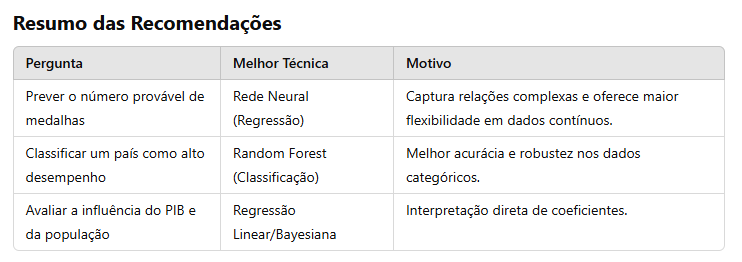

Estamos à disposição para dúvidas e feedbacks.
* Bruno Bartolomeu
* Carlos Lage